In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from keras.models import Model
from keras.layers import Dense, Input

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy


from PIL import Image
import PIL.ImageOps

In [2]:
data = pd.read_csv("mnist_train_small.csv")

In [3]:
X = data.values[:,2:]
y = data.values[:,1]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [5]:
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [32]:
in_layer = Input(shape=[784])
dense_1 = Dense(200, activation="tanh")(in_layer)

dense_2 = Dense(50, activation="tanh")(dense_1)

out = Dense(10, activation="softmax")(dense_2)


In [33]:
model = Model(inputs=[in_layer], outputs=[out])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_11 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
5360/5360 [==============================] - 1s 122us/step - loss: 1.4083 - acc: 0.5614
Epoch 2/50
5360/5360 [==============================] - 0s 53us/step - loss: 0.7259 - acc: 0.8000
Epoch 3/50
5360/5360 [==============================] - 0s 55us/step - loss: 0.5296 - acc: 0.8539
Epoch 4/50
5360/5360 [==============================] - 0s 51us/step - loss: 0.4501 - acc: 0.8793
Epoch 5/50
5360/5360 [==============================] - 0s 55us/step - loss: 0.3932 - acc: 0.8974
Epoch 6/50
5360/5360 [==============================] - 0s 59us/step - loss: 0.3708 - acc: 0.9022
Epoch 7/50
5360/5360 [==============================] - 0s 60us/step - loss: 0.3417 - acc: 0.9084
Epoch 8/50
5360/5360 [==============================] - 0s 53us/step - loss: 0.3323 - acc: 0.9095
Epoch 9/50
5360/5360 [==============================] - 0s 55us/step - loss: 0.3216 - acc: 0.9106
Epoch 10/50
5360/5360 [==============================] - 0s 62us/step - loss: 0.2955 - acc: 0.9211
Epoch 11/50
5360/5

In [37]:
model.evaluate(X_test,y_test)

2640/2640 [==============================] - 0s 92us/step


[0.325494905222546, 0.9003787878787879]

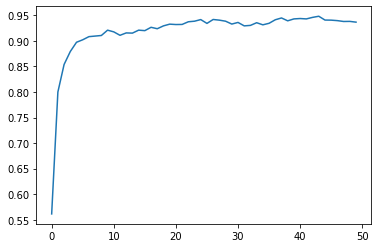

In [42]:
plt.plot(hist.history["acc"])

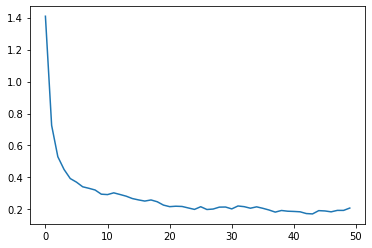

In [43]:
plt.plot(hist.history["loss"])